In [1]:
import pandas as pd
import numpy as np
import geopandas

turkey_map = geopandas.read_file('../shp/turadm/tur_polbnda_adm2.shp')
turkey_map = turkey_map.drop(['adm1_tr','adm1','pcode','adm0_en','adm0_tr','adm_0'],axis=1)

In [2]:
ist_map = turkey_map[turkey_map['adm1_en'] == 'ISTANBUL']

In [3]:
centers = ist_map.copy()
centers = centers.drop(["geometry"], axis=1)
centers['geometry'] = ist_map['geometry'].centroid

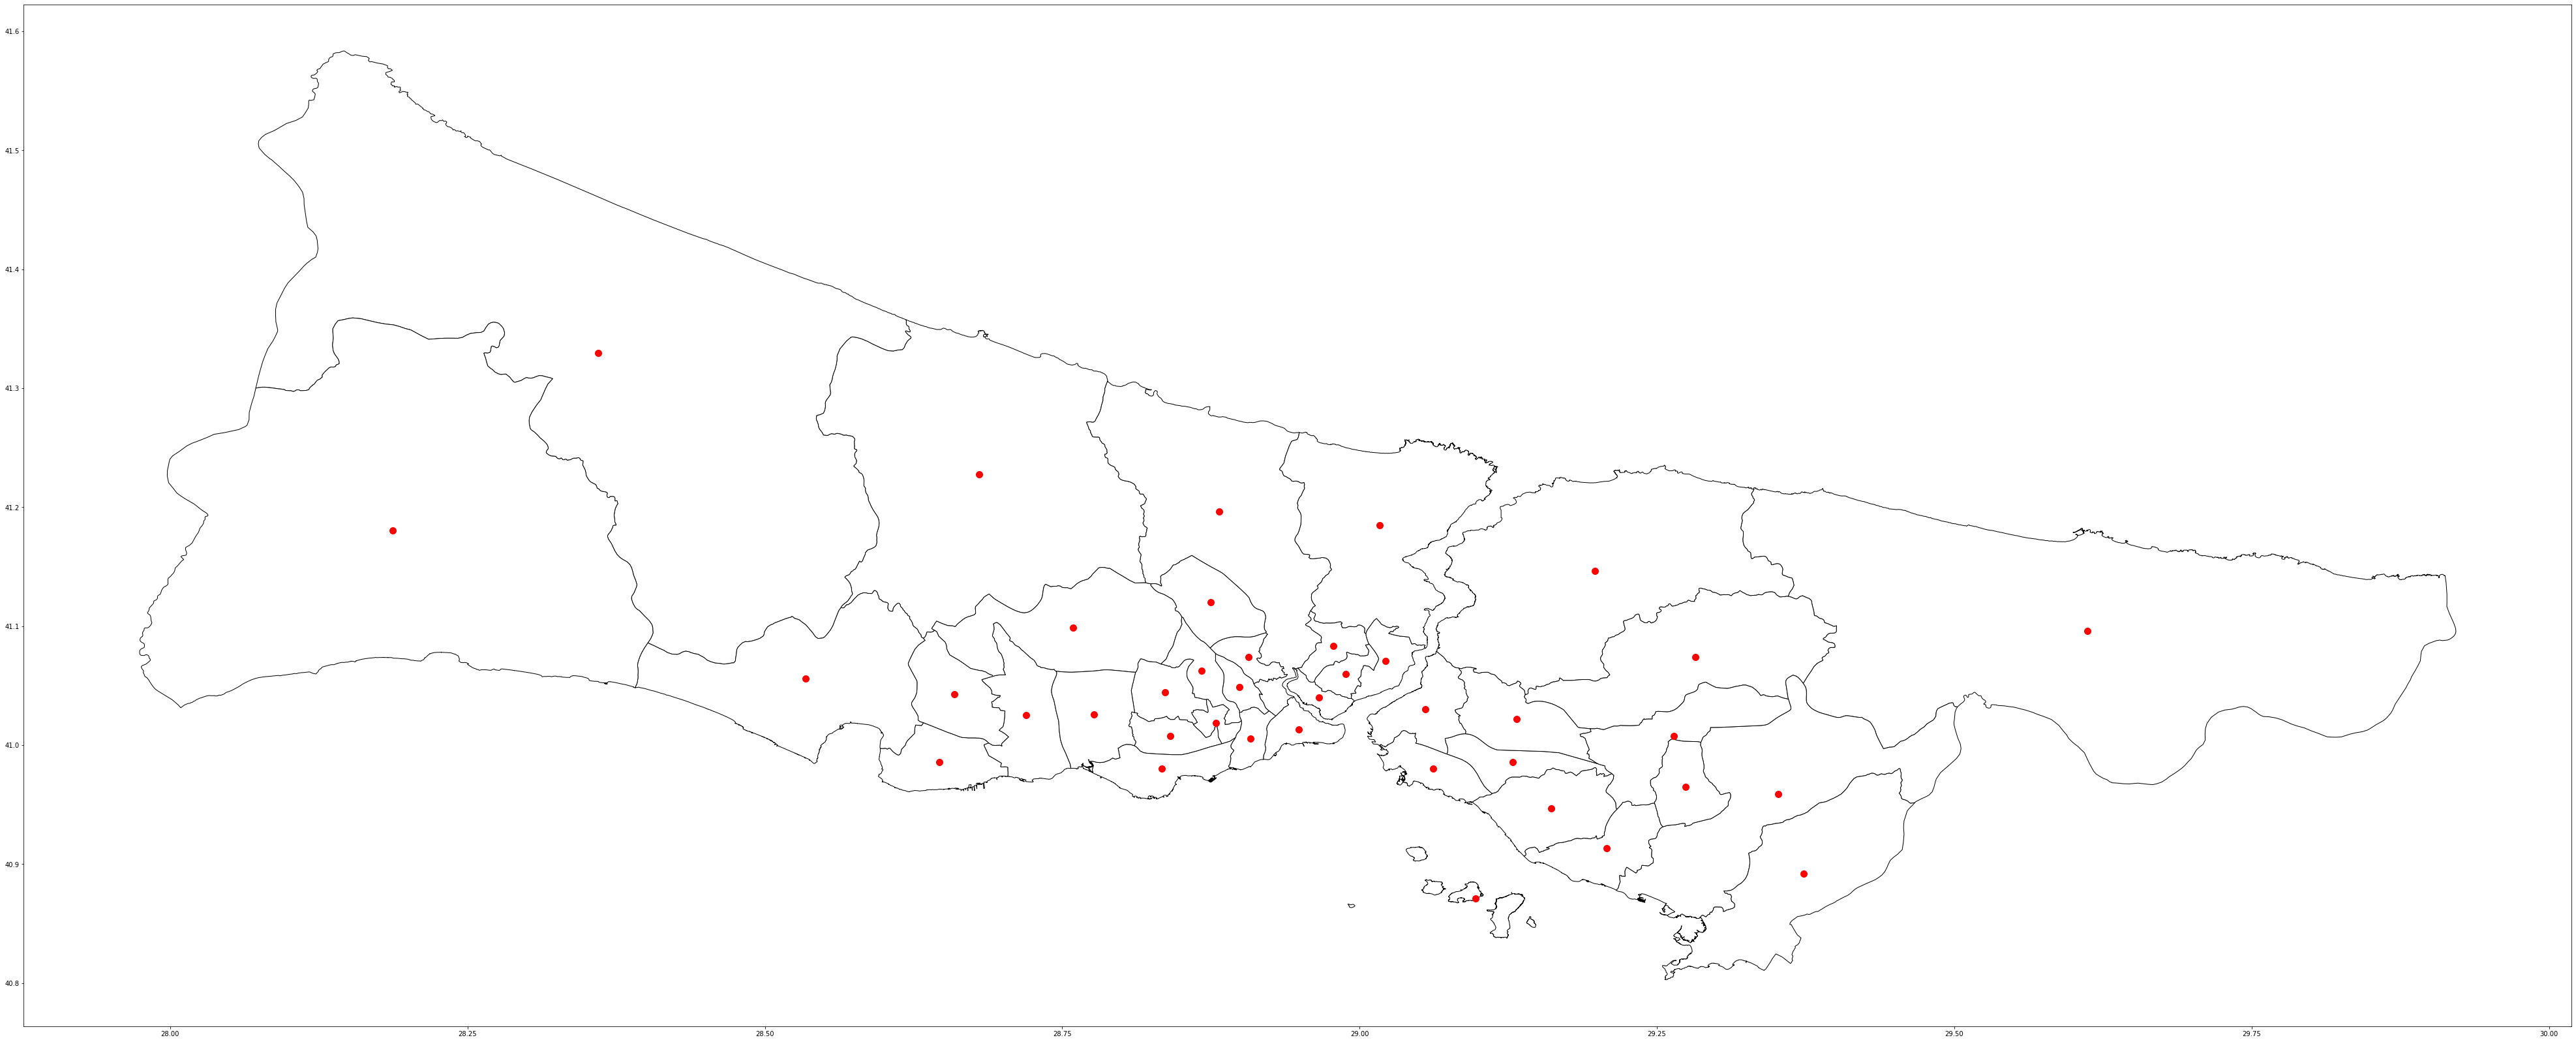

In [4]:
ax = ist_map.plot(figsize=(70,30),color='white', edgecolor='black')
centers.plot(ax=ax,color='red', markersize=100,figsize=(70,30))

In [5]:
center = centers.geometry.astype(str).map(lambda x: str(x)[6:])
eartquake = (28.80,40.86)

In [6]:
center = center.apply(lambda x: x[1:-1].split(','))
ist_map['center'] = center
ist_map.head()

/home/sila/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


OBJECTID     adm2_tr     adm2_en   adm1_en  Shape_Leng  Shape_Area  \
0           1       ŞİŞLİ       SISLI  ISTANBUL    0.187408    0.001147   
2           3        ŞİLE        SILE  ISTANBUL    1.862735    0.085721   
69         70      ADALAR      ADALAR  ISTANBUL    0.548223    0.001186   
154       155  ARNAVUTKÖY  ARNAVUTKOY  ISTANBUL    1.167397    0.048664   
164       165    ATAŞEHİR    ATASEHIR  ISTANBUL    0.342889    0.002713   

                                              geometry  \
0    POLYGON ((29.00802 41.08488, 29.00928 41.08346...   
2    POLYGON ((29.84881 41.01343, 29.84697 41.01245...   
69   MULTIPOLYGON (((29.14379 40.85561, 29.14381 40...   
154  POLYGON ((28.64241 41.09662, 28.64213 41.09582...   
164  POLYGON ((29.11148 40.95911, 29.10674 40.96328...   

                                    center  
0    [28.98860870685455 41.05999638574468]  
2    [29.61197013088189 41.09594730516545]  
69   [29.09759855610525 40.87097358734972]  
154  [28.68037288585932 41.22732720363182]  
164  [29.12871411925954 40.98592892509822]

In [7]:
from geopy.distance import geodesic
dis = []
for i, center in ist_map.iterrows():
    distance = geodesic(ist_map.center[i],eartquake)
    dis.append(str(distance).replace(' km',''))

In [8]:
df = pd.DataFrame()
df['adm2_en'] = ist_map['adm2_en']
df['distance'] = dis

In [9]:
ist_map = pd.merge(ist_map, df, on='adm2_en')
ist_map.head()

OBJECTID     adm2_tr     adm2_en   adm1_en  Shape_Leng  Shape_Area  \
0         1       ŞİŞLİ       SISLI  ISTANBUL    0.187408    0.001147   
1         3        ŞİLE        SILE  ISTANBUL    1.862735    0.085721   
2        70      ADALAR      ADALAR  ISTANBUL    0.548223    0.001186   
3       155  ARNAVUTKÖY  ARNAVUTKOY  ISTANBUL    1.167397    0.048664   
4       165    ATAŞEHİR    ATASEHIR  ISTANBUL    0.342889    0.002713   

                                            geometry  \
0  POLYGON ((29.00802 41.08488, 29.00928 41.08346...   
1  POLYGON ((29.84881 41.01343, 29.84697 41.01245...   
2  MULTIPOLYGON (((29.14379 40.85561, 29.14381 40...   
3  POLYGON ((28.64241 41.09662, 28.64213 41.09582...   
4  POLYGON ((29.11148 40.95911, 29.10674 40.96328...   

                                  center            distance  
0  [28.98860870685455 41.05999638574468]  28.592290710961215  
1  [29.61197013088189 41.09594730516545]   92.87680887271156  
2  [29.09759855610525 40.87097358734972]   33.00165613297896  
3  [28.68037288585932 41.22732720363182]   38.25229143064619  
4  [29.12871411925954 40.98592892509822]  38.445214425174385

In [10]:
ms = 7.8
siddet =pd.DataFrame(0.34 + 1.54 * ms - 1.24 * np.log(ist_map['distance'].astype(float)))
ist_map['siddet'] = siddet.round()
ist_map.head()

OBJECTID     adm2_tr     adm2_en   adm1_en  Shape_Leng  Shape_Area  \
0         1       ŞİŞLİ       SISLI  ISTANBUL    0.187408    0.001147   
1         3        ŞİLE        SILE  ISTANBUL    1.862735    0.085721   
2        70      ADALAR      ADALAR  ISTANBUL    0.548223    0.001186   
3       155  ARNAVUTKÖY  ARNAVUTKOY  ISTANBUL    1.167397    0.048664   
4       165    ATAŞEHİR    ATASEHIR  ISTANBUL    0.342889    0.002713   

                                            geometry  \
0  POLYGON ((29.00802 41.08488, 29.00928 41.08346...   
1  POLYGON ((29.84881 41.01343, 29.84697 41.01245...   
2  MULTIPOLYGON (((29.14379 40.85561, 29.14381 40...   
3  POLYGON ((28.64241 41.09662, 28.64213 41.09582...   
4  POLYGON ((29.11148 40.95911, 29.10674 40.96328...   

                                  center            distance  siddet  
0  [28.98860870685455 41.05999638574468]  28.592290710961215     8.0  
1  [29.61197013088189 41.09594730516545]   92.87680887271156     7.0  
2  [29.09759855610525 40.87097358734972]   33.00165613297896     8.0  
3  [28.68037288585932 41.22732720363182]   38.25229143064619     8.0  
4  [29.12871411925954 40.98592892509822]  38.445214425174385     8.0

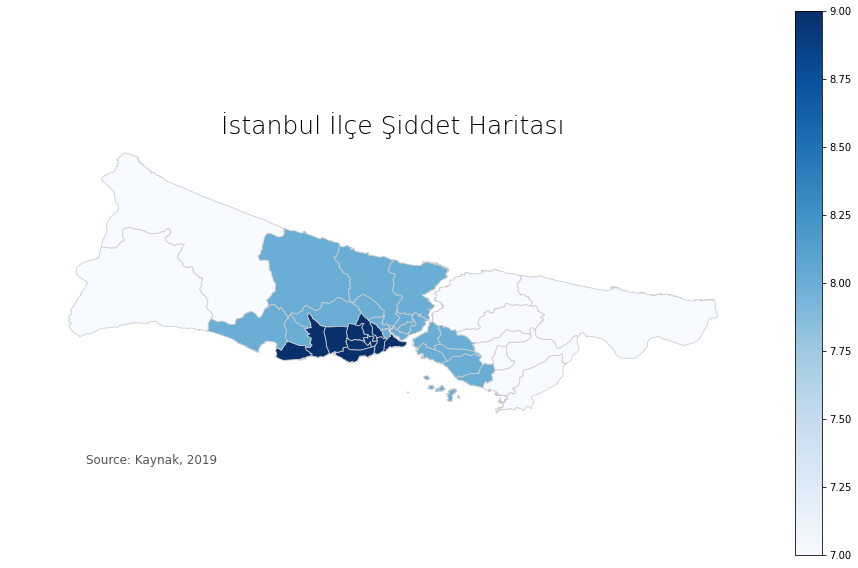

In [11]:
import matplotlib.pyplot as plt
density = 'siddet'
vmin,vmax = 50,50
fig,ax = plt.subplots(1,figsize=(16,10))
ax.axis('off')
ax.set_title("İstanbul İlçe Şiddet Haritası", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate('Source: Kaynak, 2019',xy=(0.1, 0.2),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
ist_map.plot(column=density, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8',legend=True)
#legend=True eklenecek

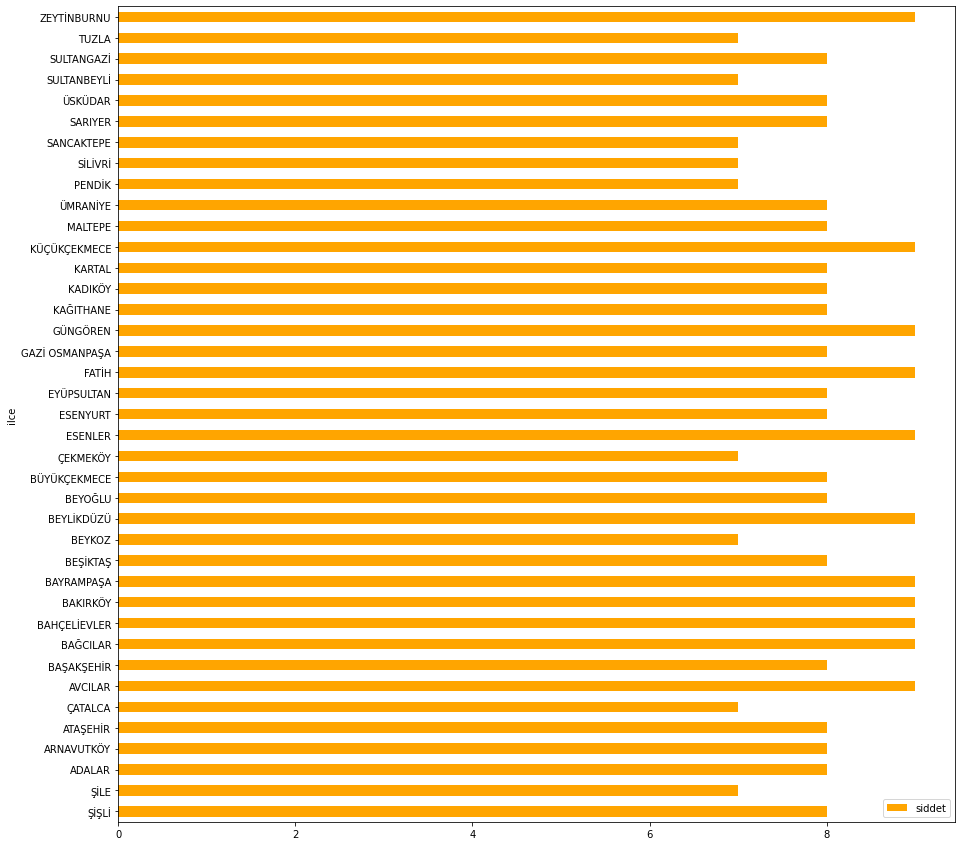

In [12]:
siddet['ilce'] = ist_map['adm2_tr']
siddet['siddet'] = ist_map['siddet']
siddet.plot.barh(rot=0,x='ilce',y='siddet',figsize=(15,15),color='orange')

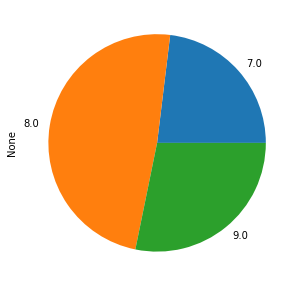

In [13]:
pasta = siddet.groupby('siddet').size()
pasta.plot.pie(figsize=(5,5))

In [14]:
golcuk_deprem = {'siddet':[6.0,7.0,8.0,9.0,10.0],'agır ve yikik':[0.04,0.91,2.82,15.70,33.06],'orta hasar':[0.22,2.67,4.41,18.16,15.29],'hafif hasar':[0.24,2.59,5.31,22.75,19.14]}
hasar = pd.DataFrame(golcuk_deprem)
hasar

siddet  agır ve yikik  orta hasar  hafif hasar
0     6.0           0.04        0.22         0.24
1     7.0           0.91        2.67         2.59
2     8.0           2.82        4.41         5.31
3     9.0          15.70       18.16        22.75
4    10.0          33.06       15.29        19.14

In [15]:
ist_map = pd.merge(ist_map, hasar, on='siddet')

In [16]:
konut = pd.read_csv('../out/istanbul_population.csv',names=['adm2_en','nufus','hane_halki','oran','hane_sayisi'])
konut = konut.drop(0,axis=0)
konut.hane_sayisi = konut.hane_sayisi.astype(float).round()

In [17]:
ist_map = pd.merge(ist_map,konut,on='adm2_en')
ist_map.head()

OBJECTID     adm2_tr     adm2_en   adm1_en  Shape_Leng  Shape_Area  \
0         1       ŞİŞLİ       SISLI  ISTANBUL    0.187408    0.001147   
1        70      ADALAR      ADALAR  ISTANBUL    0.548223    0.001186   
2       155  ARNAVUTKÖY  ARNAVUTKOY  ISTANBUL    1.167397    0.048664   
3       165    ATAŞEHİR    ATASEHIR  ISTANBUL    0.342889    0.002713   
4       203  BAŞAKŞEHİR  BASAKSEHIR  ISTANBUL    0.615359    0.011455   

                                            geometry  \
0  POLYGON ((29.00802 41.08488, 29.00928 41.08346...   
1  MULTIPOLYGON (((29.14379 40.85561, 29.14381 40...   
2  POLYGON ((28.64241 41.09662, 28.64213 41.09582...   
3  POLYGON ((29.11148 40.95911, 29.10674 40.96328...   
4  POLYGON ((28.83303 41.06810, 28.82897 41.06974...   

                                  center            distance  siddet  \
0  [28.98860870685455 41.05999638574468]  28.592290710961215     8.0   
1  [29.09759855610525 40.87097358734972]   33.00165613297896     8.0   
2  [28.68037288585932 41.22732720363182]   38.25229143064619     8.0   
3  [29.12871411925954 40.98592892509822]  38.445214425174385     8.0   
4  [28.75909019318206 41.09844067299611]  23.719907027258472     8.0   

   agır ve yikik  orta hasar  hafif hasar     nufus hane_halki  \
0           2.82        4.41         5.31  279817.0        2.9   
1           2.82        4.41         5.31   15238.0        3.2   
2           2.82        4.41         5.31  282488.0       4.11   
3           2.82        4.41         5.31  425094.0       3.49   
4           2.82        4.41         5.31  460259.0       4.44   

                  oran  hane_sayisi  
0   1.8030297436083804      96489.0  
1  0.09818762703161174       4762.0  
2   1.8202406080132523      68732.0  
3   2.7391370997096707     121803.0  
4   2.9657264096300424     103662.0

In [18]:
ist_map['yikik_agir_hasar'] = ((ist_map['hane_sayisi'].astype(float) * ist_map['agır ve yikik'].astype(float)) / 100).round()
ist_map['orta_hasarli'] = ((ist_map['hane_sayisi'].astype(float) * ist_map['orta hasar'].astype(float)) / 100).round()
ist_map['hafif_hasarli'] = ((ist_map['hane_sayisi'].astype(float) * ist_map['hafif hasar'].astype(float)) / 100).round()
ist_map.head()


OBJECTID     adm2_tr     adm2_en   adm1_en  Shape_Leng  Shape_Area  \
0         1       ŞİŞLİ       SISLI  ISTANBUL    0.187408    0.001147   
1        70      ADALAR      ADALAR  ISTANBUL    0.548223    0.001186   
2       155  ARNAVUTKÖY  ARNAVUTKOY  ISTANBUL    1.167397    0.048664   
3       165    ATAŞEHİR    ATASEHIR  ISTANBUL    0.342889    0.002713   
4       203  BAŞAKŞEHİR  BASAKSEHIR  ISTANBUL    0.615359    0.011455   

                                            geometry  \
0  POLYGON ((29.00802 41.08488, 29.00928 41.08346...   
1  MULTIPOLYGON (((29.14379 40.85561, 29.14381 40...   
2  POLYGON ((28.64241 41.09662, 28.64213 41.09582...   
3  POLYGON ((29.11148 40.95911, 29.10674 40.96328...   
4  POLYGON ((28.83303 41.06810, 28.82897 41.06974...   

                                  center            distance  siddet  \
0  [28.98860870685455 41.05999638574468]  28.592290710961215     8.0   
1  [29.09759855610525 40.87097358734972]   33.00165613297896     8.0   
2  [28.68037288585932 41.22732720363182]   38.25229143064619     8.0   
3  [29.12871411925954 40.98592892509822]  38.445214425174385     8.0   
4  [28.75909019318206 41.09844067299611]  23.719907027258472     8.0   

   agır ve yikik  orta hasar  hafif hasar     nufus hane_halki  \
0           2.82        4.41         5.31  279817.0        2.9   
1           2.82        4.41         5.31   15238.0        3.2   
2           2.82        4.41         5.31  282488.0       4.11   
3           2.82        4.41         5.31  425094.0       3.49   
4           2.82        4.41         5.31  460259.0       4.44   

                  oran  hane_sayisi  yikik_agir_hasar  orta_hasarli  \
0   1.8030297436083804      96489.0            2721.0        4255.0   
1  0.09818762703161174       4762.0             134.0         210.0   
2   1.8202406080132523      68732.0            1938.0        3031.0   
3   2.7391370997096707     121803.0            3435.0        5372.0   
4   2.9657264096300424     103662.0            2923.0        4571.0   

   hafif_hasarli  
0         5124.0  
1          253.0  
2         3650.0  
3         6468.0  
4         5504.0

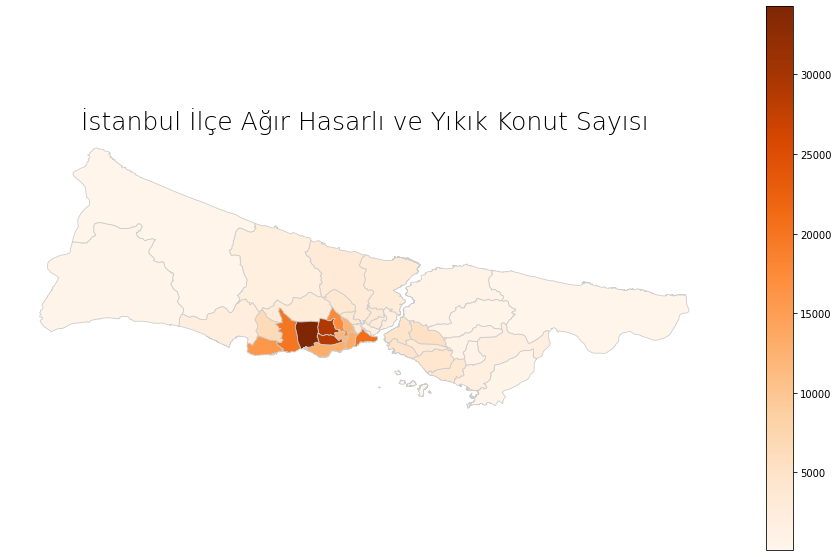

In [19]:
import matplotlib.pyplot as plt
density = 'yikik_agir_hasar'
vmin,vmax = 50,50
fig,ax = plt.subplots(1,figsize=(16,10))
ax.axis('off')
ax.set_title("İstanbul İlçe Ağır Hasarlı ve Yıkık Konut Sayısı", fontdict={"fontsize": "25", "fontweight" : "3"})
ist_map.plot(column=density, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8',legend=True)

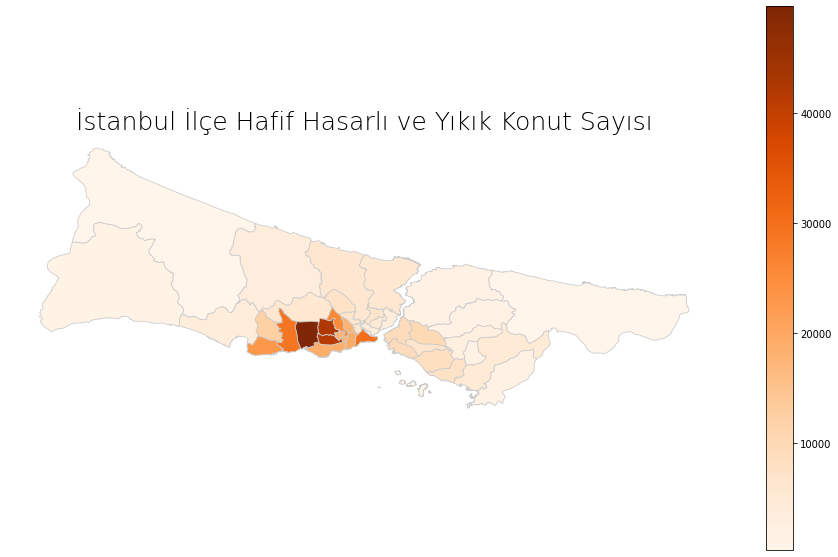

In [20]:
density = 'hafif_hasarli'
vmin,vmax = 50,50
fig,ax = plt.subplots(1,figsize=(16,10))
ax.axis('off')
ax.set_title("İstanbul İlçe Hafif Hasarlı ve Yıkık Konut Sayısı", fontdict={"fontsize": "25", "fontweight" : "3"})
ist_map.plot(column=density, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8',legend=True)

### İbb ve Kandilli yenilenmiş makale deprem - hasar seviyeleri tablosu 

* Seviye 1 - ayakta tedavi gerektiren yaralar
* Seviye 2 - Kısa süreli hastane tedavisi
* Seviye 3 - Uzun sürelei hastane tedavisi
* Seviye 4 - Ani ölüm veya ölümle sonuçlanan yaralanma

In [21]:
deprem_can_model_1 = {'yaralanma_seviye':[1,2,3,4],'hafif_hasar':[0.1,0.01,0,0],'orta_hasar':[0.5,0.05,0,0],'agir_hasar':[30,20,4,8],'yikik_bina':[50,25,10,15]}
deprem_can_model_1 = pd.DataFrame(deprem_can_model_1)
deprem_can_model_1

yaralanma_seviye  hafif_hasar  orta_hasar  agir_hasar  yikik_bina
0                 1         0.10        0.50          30          50
1                 2         0.01        0.05          20          25
2                 3         0.00        0.00           4          10
3                 4         0.00        0.00           8          15

In [22]:
toplam_hafif_hasarli = ist_map['hafif_hasarli'].sum()
toplam_orta_hasarli = ist_map['orta_hasarli'].sum()
toplam_agir_hasarli = ist_map['yikik_agir_hasar'].sum()
print('İstanbul toplam ağır hasarlı bina sayısı : ',toplam_agir_hasarli)
print('İstanbul toplam orta hasarlı bina sayısı : ',toplam_orta_hasarli)
print('İstanbul toplam hafif hasarlı bina sayısı : ',toplam_hafif_hasarli)


İstanbul toplam ağır hasarlı bina sayısı :  288277.0
İstanbul toplam orta hasarlı bina sayısı :  371107.0
İstanbul toplam hafif hasarlı bina sayısı :  454681.0


In [23]:
istanbul_yaralanma = pd.DataFrame()
istanbul_yaralanma['adm2_en'] = ist_map['adm2_en']
istanbul_yaralanma['seviye_1_yaralanma'] = (ist_map['hafif_hasarli'] * 0.10 + ist_map['orta_hasarli'] * 0.50 + ist_map['yikik_agir_hasar'] * 40)/100
istanbul_yaralanma['seviye_2_yaralanma'] = (ist_map['hafif_hasarli'] * 0.01 + ist_map['orta_hasarli'] * 0.05 + ist_map['yikik_agir_hasar'] * 22.5)/100
istanbul_yaralanma['seviye_3_yaralanma'] = (ist_map['hafif_hasarli'] * 0.00 + ist_map['orta_hasarli'] * 0.00 + ist_map['yikik_agir_hasar'] * 7)/100
istanbul_yaralanma['seviye_4_yaralanma'] = (ist_map['hafif_hasarli'] * 0.00 + ist_map['orta_hasarli'] * 0.00 + ist_map['yikik_agir_hasar'] * 11)/100
istanbul_yaralanma.head()


adm2_en  seviye_1_yaralanma  seviye_2_yaralanma  seviye_3_yaralanma  \
0       SISLI            1114.799            614.8649              190.47   
1      ADALAR              54.903             30.2803                9.38   
2  ARNAVUTKOY             794.005            437.9305              135.66   
3    ATASEHIR            1407.328            776.2078              240.45   
4  BASAKSEHIR            1197.559            660.5109              204.61   

   seviye_4_yaralanma  
0              299.31  
1               14.74  
2              213.18  
3              377.85  
4              321.53

In [24]:
toplam_seviye_1_yarali = istanbul_yaralanma['seviye_1_yaralanma'].sum()
toplam_seviye_2_yarali = istanbul_yaralanma['seviye_2_yaralanma'].sum()
toplam_seviye_3_yarali = istanbul_yaralanma['seviye_3_yaralanma'].sum()
toplam_seviye_4_yarali = istanbul_yaralanma['seviye_4_yaralanma'].sum()

print('İstanbul toplam seviye 1 yaralı insan sayısı : ',toplam_seviye_1_yarali)
print('İstanbul toplam seviye 2 yaralı insan sayısı : ',toplam_seviye_2_yarali)
print('İstanbul toplam seviye 3 yaralı insan sayısı : ',toplam_seviye_3_yarali)
print('İstanbul toplam seviye 4 yaralı insan sayısı : ',toplam_seviye_4_yarali)

İstanbul toplam seviye 1 yaralı insan sayısı :  117621.016
İstanbul toplam seviye 2 yaralı insan sayısı :  65093.3466
İstanbul toplam seviye 3 yaralı insan sayısı :  20179.39
İstanbul toplam seviye 4 yaralı insan sayısı :  31710.47


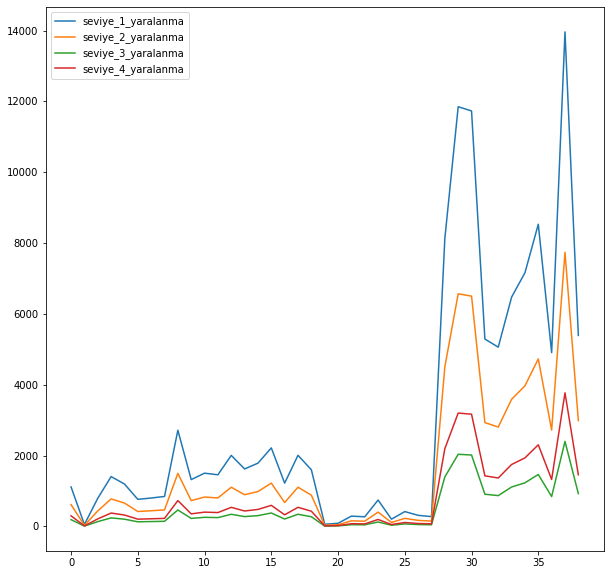

In [25]:
istanbul_yaralanma.plot(figsize=(10,10))

In [26]:
ist_map = pd.merge(ist_map,istanbul_yaralanma,on='adm2_en')

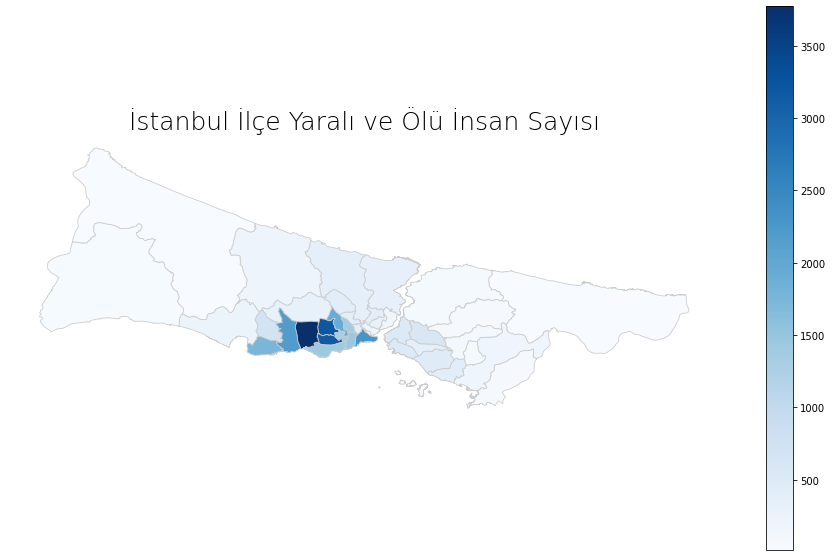

In [27]:
density = 'seviye_4_yaralanma'
vmin,vmax = 50,50
fig,ax = plt.subplots(1,figsize=(16,10))
ax.axis('off')
ax.set_title("İstanbul İlçe Yaralı ve Ölü İnsan Sayısı", fontdict={"fontsize": "25", "fontweight" : "3"})
ist_map.plot(column=density, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8',legend=True)

In [28]:
ist_map.to_csv('../out/estimation.csv')